## 서울시 기준, 자치구별 CCTV 현황, 인구현황 분석

- 개별 데이터 분석
- 상관성 분석
- pandas 사용법 습득, 시각화 기초

### 1. 데이터 수집(획득) 및 로드

In [145]:
import numpy as np
import pandas as pd

- pandas에서 엑셀(csv) 파일 로드
- 데이터를 부분 확인 후 데이터의 이상여부 간단히 시각적 확인

In [36]:
s_cctv = pd.read_excel('../data/seoul_cctv_state.xlsx', encoding = 'utf-8')

In [37]:
# 전체 확인
s_cctv

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


In [38]:
# 상위값 확인
# s_cctv.head() : 상위 5개
# s_cctv.head(2) : 상위 2개
s_cctv.head(2)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [39]:
# 하위값 확인
# s_cctv.tail() : 하위 5개
# s_cctv.tail(2) : 하위 2개
s_cctv.tail(2)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9


- 대략적으로 탐색한 결과, 동대문구와 중랑구에 결측치(NaN) 확인

###### 컬럼명 확인 : .columns

In [40]:
s_cctv.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [41]:
# 컬럼명 '2011년 이전' 획득
s_cctv.columns[2]

'2011년 이전'

###### 데이터의 차원, 모습 확인 : .shape

In [42]:
s_cctv.shape

(25, 10)

###### 인덱스 확인 : .index

In [43]:
# 인덱스
s_cctv.index

RangeIndex(start=0, stop=25, step=1)

###### 컬럼명 변경 : .rename(columns = { : }, inplace = True)

In [44]:
# '기관명' -> '자치구'로 변경 (의미 명확성 부여 목적)
# => DataFrame의 컬럼명 변경 
# 파라미터 inplace : 원본을 변경할 것인가? True면 원본 변경(원본에 반영)
s_cctv.rename(columns={s_cctv.columns[0] : '자치구'}, inplace = True)
# columns = {} -> 딕셔너리 형태로 주겠다는 의미

In [45]:
s_cctv.head(2)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


## 실습
- 변수명 s_pop으로 report.csv를 로드하시오.
- 일단 Report.xls로 read_excel 진행

In [46]:
# 데이터를 보니 컬럼이 3개
# -> 헤더를 2번으로 지정
# 필요없는 데이터는 로드 단계에서 걷어내기 -> 사전에 데이터를 보고 판단
s_pop = pd.read_excel('../data/Report.xls', encoding='euc_kr', header = 2,
                     usecols = 'A, B, D, G, J, P')
s_pop.head()

,기간,자치구,계,계.1,계.2,65세이상고령자
0,2011,합계,10528774,10249679,279095,1049425
1,2011,종로구,177419,168382,9037,22939
2,2011,중구,141567,133193,8374,18099
3,2011,용산구,259288,246501,12787,31837
4,2011,성동구,308767,300711,8056,32767


In [47]:
# 컬럼명을 의미있게 조정
# 계 ~ ...고령자 -> 인구수, 한국인, 외국인, 고령자
s_pop.rename(columns={s_pop.columns[2] : '인구수',
                      s_pop.columns[3] : '한국인',
                      s_pop.columns[4] : '외국인',
                      s_pop.columns[5] : '고령자'}, inplace = True)

In [48]:
# 변경 확인
s_pop.head(2)

,기간,자치구,인구수,한국인,외국인,고령자
0,2011,합계,10528774,10249679,279095,1049425
1,2011,종로구,177419,168382,9037,22939


## pandas 기초 학습
<a href = 'http://localhost:8889/notebooks/pandas/basic/pandas_기초.ipynb'>이동하기</a>

## 데이터 특성 파악

In [49]:
s_cctv.head(2)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


###### 정렬 : .sort_values()

In [50]:
# 소계 컬럼을 중심으로 오름차순 정렬
s_cctv.sort_values(by='소계', ascending=True).head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328


- 2011년도 이전 대비, 향후 7년간 증가율 계산
- 7년간 증가율 = (2012~2018년 합산) / 2011년 * 100

In [51]:
s_cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


[문제점]
- 결측치가 존재하는 중랑구, 동대문구에 대한 조치 필요
> - 결측치를 0으로 처리하는 방안  
> - 최초 데이터가 존재하는 년도까지 기준점으로 잡고 가는 방향  
> - 최초 데이터에 대한 의구심을 가지고 다시 데이터를 수집하는 방향  
- 종로구는 초기 데이터가 워낙 작아서 증가율이 너무 크게 나온다
> 특정 구간까지는 ~년도 이전으로 묶어주는 것이 나을 듯
- 공공데이터 자료 검토 결과 2018년도와 2019년도 자료가 상이

[해결 방안]
- NaN → 0으로 처리
- 원래는 자료 제공 기관에 문의하여 확인 과정이 필요하나, 절차상 생략하고 2019년도 자료 중에서 2011년 이전, 2012년, 2013년, 2014년까지를 합산하여 새로운 컬럼 '2014년도 이전'을 생성
- 필요없는 자료는 제거
- '2014년도 이전' 대비 2015~2018(4년간) 증가율 '최신증가율' 항목 추가

### nan 처리 → 결측치 처리

###### 결측치 0으로 대체 : .fillna(0)

In [52]:
s_cctv = s_cctv.fillna(0)
s_cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


In [53]:
# 반복문으로 '2014년 이전' 계산해보기
# tmp_sum = 0
# for i in range(2, 6) :
#     tmp_sum = tmp_sum + s_cctv.iloc[:,i]
# tmp_sum

In [54]:
# s_cctv['2014년도 이전'] = s_cctv['2011년 이전'] + s_cctv['2012년'] + s_cctv['2013년'] + s_cctv['2014년']
s_cctv['2014년도 이전'] = s_cctv.iloc[:, 2:6].sum(axis=1) # 축 방향
s_cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2014년도 이전
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,2885.0
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,883.0
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,546.0
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,722.0
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,1392.0
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,682.0
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,1607.0
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,387.0
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156,881.0
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,456.0


###### 제거 : .drop()

In [55]:
try :
    # 제거
    s_cctv.drop(s_cctv.columns[2:6], inplace = True, axis = 1)
except Exception as e :
    pass

In [56]:
s_cctv.head()

,자치구,소계,2015년,2016년,2017년,2018년,2014년도 이전
0,강 남 구,5221,546,765,577,448,2885.0
1,강 동 구,1879,144,194,273,385,883.0
2,강 북 구,1265,145,254,1,319,546.0
3,강 서 구,1617,187,190,264,254,722.0
4,관 악 구,3985,609,619,694,671,1392.0


In [59]:
s_cctv['최신증가율'] = s_cctv.iloc[ :, 2:6].sum(axis=1) / s_cctv['2014년도 이전'] * 100 

In [60]:
s_cctv.head(2)

,자치구,소계,2015년,2016년,2017년,2018년,2014년도 이전,최신증가율
0,강 남 구,5221,546,765,577,448,2885.0,80.970537
1,강 동 구,1879,144,194,273,385,883.0,112.797282


###### 펜시 인덱싱을 통해 컬럼 재배치

In [61]:
# '2014년도 이전'을 소계 바로 뒤에
s_cctv = s_cctv.iloc[ :, [0, 1, 6, 2, 3, 4, 5, 7]]

In [62]:
s_cctv.head(2)

,자치구,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율
0,강 남 구,5221,2885.0,546,765,577,448,80.970537
1,강 동 구,1879,883.0,144,194,273,385,112.797282


## 인구 현황 분석

In [65]:
s_pop.head()

,기간,자치구,인구수,한국인,외국인,고령자
0,2011,합계,10528774,10249679,279095,1049425
1,2011,종로구,177419,168382,9037,22939
2,2011,중구,141567,133193,8374,18099
3,2011,용산구,259288,246501,12787,31837
4,2011,성동구,308767,300711,8056,32767


In [66]:
s_pop.shape

(208, 6)

In [67]:
s_pop.dtypes

기간      int64
자치구    object
인구수     int64
한국인     int64
외국인     int64
고령자     int64
dtype: object

In [70]:
# s_pop에서 기간이 2014~2018년도까지만 추출
# s_pop[ (s_pop.기간 >= 2014) & (s_pop.기간 <= 2018) ]
s_pop_last = s_pop[s_pop['기간']>=2014]
s_pop_last.shape

(130, 6)

In [71]:
s_cctv.shape

(25, 8)

In [72]:
# 자치구 개수로 인구 현황 데이터 개수를 나눠보니 딱 떨어지지 않는다
# -> 년도별로 데이터가 1개씩 더 있다
s_pop_last.shape[0] / s_cctv.shape[0] # = 5.2

5.2

In [84]:
# 년도별로 '합계' 데이터가 추가되어 있다
# -> ''합계' 제거해서 데이터프레임 구성
# s_pop_last[s_pop_last['자치구'].isin(['합계'])==False]
s_pop_last = s_pop_last[s_pop_last['자치구'] != '합계']

In [86]:
# 데이터 매칭 정상
s_pop_last.shape[0] / s_cctv.shape[0] 

5.0

In [89]:
# 데이터 프레임을 합쳐서 진행할 것인데, 자치구 데이터들이 고유한지 체크
len(s_cctv['자치구'].unique()), len(s_pop_last['자치구'].unique())

(25, 25)

### NaN 검출 
- isnull() 검사 -> boolean 인덱싱 이용 -> 원데이터에 대상 index를 획득
- any()로 검사 후 참(True)이면 해당 인덱스에 일치하는 데이터를 제거

###### .isnull()

In [90]:
s_cctv['자치구'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: 자치구, dtype: bool

In [95]:
nanidx = s_cctv[s_cctv['자치구'].isnull()].index
if nanidx.any() :
    s_cctv.drop([nanidx], inplace = True)

In [96]:
# 인구 데이터 s_pop_last에서 '외국인비율', '고령자비율' 컬럼 추가
# 외국인비율 = 외국인/인구수 * 100
# 고령자비율 = 고령자/인구수 * 100
s_pop_last['외국인비율'] = s_pop_last['외국인'] / s_pop_last['인구수'] * 100
s_pop_last['고령자비율'] = s_pop_last['고령자'] / s_pop_last['인구수'] * 100

In [97]:
s_pop_last.head(2)

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
79,2014,종로구,165344,156993,8351,24537,5.050682,14.839970
80,2014,중구,136227,128065,8162,19960,5.991470,14.652015


In [100]:
# s_pop_last에서 2018년도 데이터만 획득하여 s_pop_last_2018 생성
s_pop_last_2018 = s_pop_last[s_pop_last['기간'] == 2018]

In [101]:
s_pop_last_2018.shape

(25, 8)

### DataFrame 합치기 : 병합
<a href = '/notebooks/analysis/pandas/basic/pandas_advanced.ipynb'>이동하기</a>

In [ ]:
# s_cctv, s_pop_last_2018 병합

In [102]:
# s_cctv['자치구'] 문자열 내부에 공백이 존재
# 자치구명 통일 필요
s_cctv['자치구'], s_pop_last_2018['자치구']

(0       강 남 구
 1       강 동 구
 2       강 북 구
 3       강 서 구
 4       관 악 구
 5       광 진 구
 6       구 로 구
 7       금 천 구
 8       노 원 구
 9       도 봉 구
 10       동대문구
 11      동 작 구
 12      마 포 구
 13       서대문구
 14      서 초 구
 15      성 동 구
 16      성 북 구
 17      송 파 구
 18      양 천 구
 19       영등포구
 20      용 산 구
 21      은 평 구
 22      종 로 구
 23    중     구
 24      중 랑 구
 Name: 자치구, dtype: object, 183     종로구
 184      중구
 185     용산구
 186     성동구
 187     광진구
 188    동대문구
 189     중랑구
 190     성북구
 191     강북구
 192     도봉구
 193     노원구
 194     은평구
 195    서대문구
 196     마포구
 197     양천구
 198     강서구
 199     구로구
 200     금천구
 201    영등포구
 202     동작구
 203     관악구
 204     서초구
 205     강남구
 206     송파구
 207     강동구
 Name: 자치구, dtype: object)

###### 문자열 대체 : (문자열).replace( '', '' )

In [103]:
# '용 산 구'.replace(' ', '')

'용산구'

In [105]:
# s_cctv의 자치구 데이터를 한 개씩 꺼내서 공백을 제거
s_cctv['자치구'] = s_cctv['자치구'].apply(lambda x : x.replace(' ', ''))

In [ ]:
# def rmSpace(x) :
#    return x.replace(' ', '')
# s_cctv['자치구'].apply(rmSpace)

In [106]:
s_cctv.head(2)

,자치구,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율
0,강남구,5221,2885.0,546,765,577,448,80.970537
1,강동구,1879,883.0,144,194,273,385,112.797282


###### 데이터 병합 : pd.merge(데이터1, 데이터2, on='(인덱스)')

In [123]:
# 데이터 보정 완료 -> 병합
data_result = pd.merge(s_cctv, s_pop_last_2018, on='자치구')
data_result.head(2)

,자치구,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율,기간,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,2885.0,546,765,577,448,80.970537,2018,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,883.0,144,194,273,385,112.797282,2018,431920,427573,4347,58770,1.006436,13.606686


In [124]:
# '기간' 제거
# data_result.drop(['기간'], inplace=True, axis=1)
del data_result['기간']

###### 특정 컬럼을 인덱스로 적용 : .set_index('자치구', inplace=True)

In [126]:
# '자치구' 컬럼을 인덱스로 적용
data_result.set_index('자치구', inplace = True)
data_result.head()

,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,,,
강남구,5221,2885.0,546,765,577,448,80.970537,547453,542364,5089,67085,0.929578,12.254020
강동구,1879,883.0,144,194,273,385,112.797282,431920,427573,4347,58770,1.006436,13.606686
강북구,1265,546.0,145,254,1,319,131.684982,322915,319164,3751,58196,1.161606,18.022080
강서구,1617,722.0,187,190,264,254,123.961219,603611,596949,6662,79660,1.103691,13.197241
관악구,3985,1392.0,609,619,694,671,186.278736,520040,501957,18083,72249,3.477233,13.892970


## 상관성 검사
- 상관계수 : 0 ~ 1
 > 0.1 이하 : 거의 관련 없음. 무시  
 > 0.3 이하 : 약한 상관관계  
 > 0.7 이하 : 뚜렷한 상관관계  
 > ~ 이상 : 명확한 상관관계
- np.corrcoef

In [127]:
data_result.columns

Index(['소계', '2014년도 이전', '2015년', '2016년', '2017년', '2018년', '최신증가율', '인구수',
       '한국인', '외국인', '고령자', '외국인비율', '고령자비율'],
      dtype='object')

###### np.corrcoef

In [128]:
# cctv 설치 총량 대비 고령자 비율
np.corrcoef(data_result['고령자비율'], data_result['소계'])
# 행렬로 응답, 대각선에 기준값이 출력
# -0.40379375 -> 관련 없음

array([[ 1.        , -0.40379375],
       [-0.40379375,  1.        ]])

In [129]:
np.corrcoef(data_result['인구수'], data_result['소계'])
# 0.37523207 : 뚜렷한('약한'에 가까운) 상관관계

array([[1.        , 0.37523207],
       [0.37523207, 1.        ]])

In [130]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.04143132],
       [-0.04143132,  1.        ]])

## cctv가 많은 자치구 시각화

In [131]:
# 데이터 정렬 선행
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,,,
강남구,5221,2885.0,546,765,577,448,80.970537,547453,542364,5089,67085,0.929578,12.254020
관악구,3985,1392.0,609,619,694,671,186.278736,520040,501957,18083,72249,3.477233,13.892970
구로구,3227,1607.0,268,326,540,486,100.808961,438486,404497,33989,61801,7.751445,14.094179
성북구,3003,1408.0,279,388,285,643,113.281250,447687,435868,11819,67782,2.640014,15.140489
은평구,2962,1890.0,180,296,229,367,56.719577,487666,483197,4469,77420,0.916406,15.875620


## 시각화 기초
<a href = '/notebooks/analysis/pandas/basic/시각화.ipynb'>시각화</a> <br>
<a href = '/notebooks/analysis/pandas/basic/matplotlib_시각화기초.ipynb'>matplotlib_시각화 기초</a>

In [115]:
from matplotlib import pyplot as plt
import matplotlib

In [116]:
%matplotlib inline

## 폰트 load (full code)

In [118]:
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


###### plt.figure()
###### plt.show()

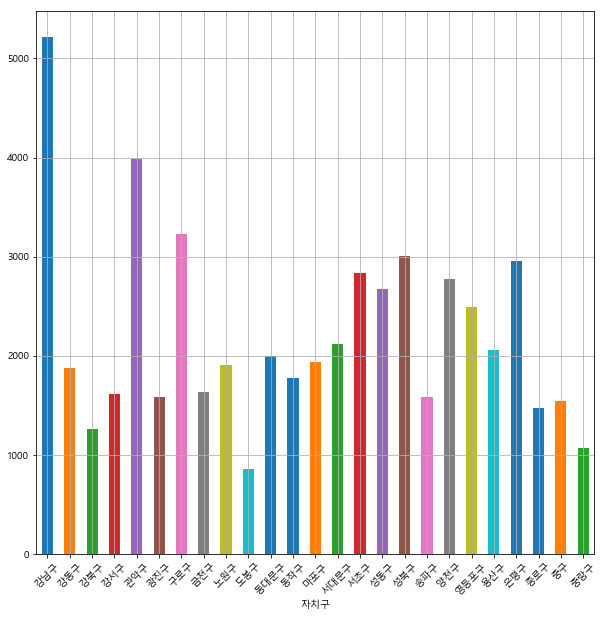

In [132]:
# 소계의 자치구별 bar chart 시각화
plt.figure()
data_result['소계'].plot(kind = 'bar', grid=True, figsize=(10, 10), rot=45)
plt.show()

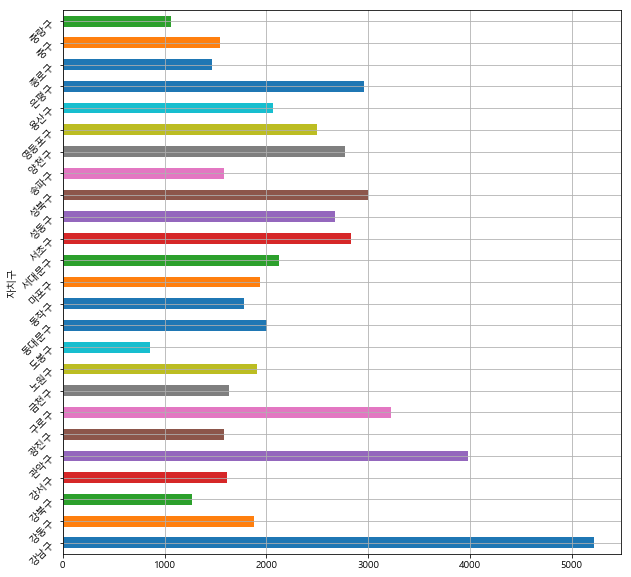

In [133]:
plt.figure()
# horizontal
data_result['소계'].plot(kind = 'barh', grid=True, figsize=(10, 10), rot=45)
plt.show()

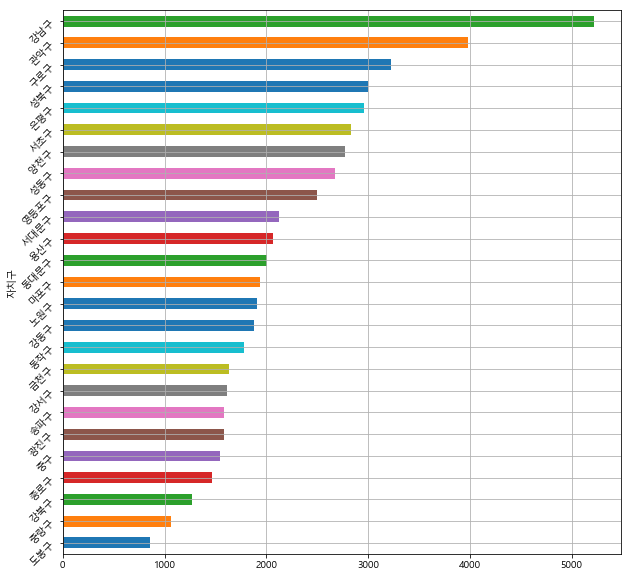

In [134]:
plt.figure()
data_result['소계'].sort_values().plot(kind = 'barh', grid=True, figsize=(10, 10), rot=45)
plt.show()

In [135]:
# 인구대비 cctv 비율을 계산
# 'cctv비율' 컬럼 생성 
data_result['cctv비율'] = data_result['소계'] / data_result['인구수'] * 100

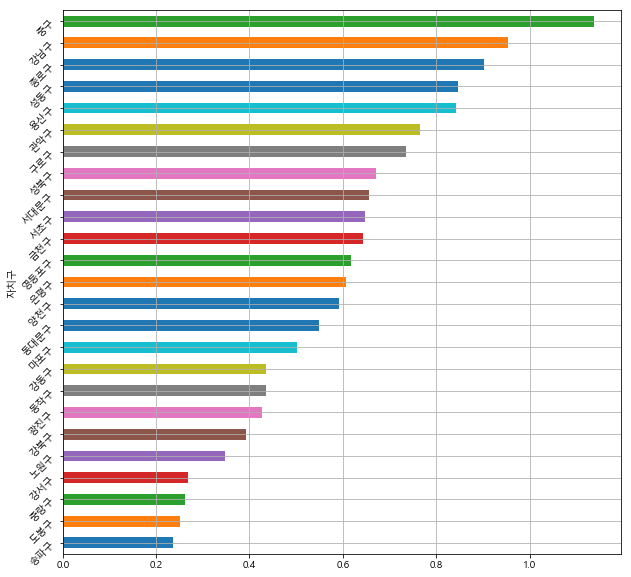

In [136]:
# cctv비율 순으로 정렬 -> 시각화(바차트 수평처리)
plt.figure()
data_result['cctv비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10), rot=45)
plt.show()

## 산포도, 평균선 작성
- 인구대비 cctv 설치 비율이 가장 적정한 자치구는?

###### 산포도 : scatter

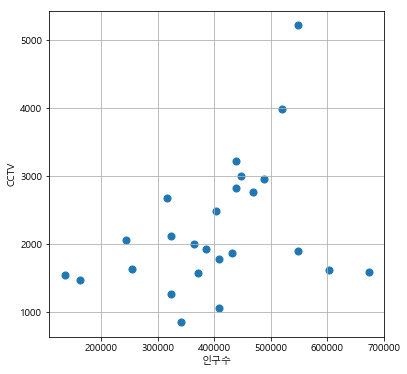

In [141]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

###### 기울기, 절편 값 찾기 : np.polyfit()

In [143]:
# 위의 산포도 기준으로 데이터의 분포를 설명할 수 있는 기울기가 1인 직선값을 찾는 방법
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
# y = ax+b
# a : 기울기
# b : 절편
fp1
# [기울기, 절편]

array([2.85240371e-03, 1.07309855e+03])

###### 함수 생성 : np.poly1d()

In [147]:
# 기울기, 절편을 넣어서 함수를 생성
f1 = np.poly1d(fp1)
type(f1)

numpy.lib.polynomial.poly1d

###### np.linspace()

In [148]:
# x축 데이터
# 100000에서 700000 사이를 100개로 구간을 나눈다
fx = np.linspace(100000, 700000, 100)
len(fx)

100

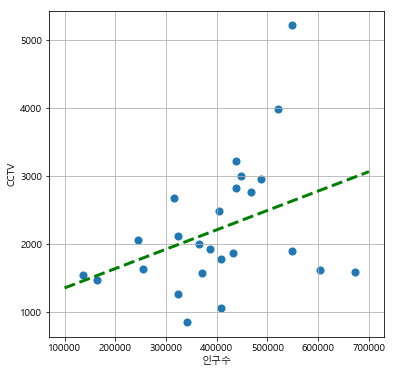

In [149]:
# 산포도
plt.figure( figsize = (6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
# 인구수 대비 cctv 수 직선
plt.plot(fx, f1(fx), ls = 'dashed', color = 'g', lw = 3 ) # ls : 선의 모양
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [150]:
# 직선은 대표값이다
tmp = [100000, 200000, 300000, 400000, 500000, 600000, 700000]
f1(tmp)
# 인구수 40만 명일때, 적정 cctv 설치 대수는 2214대

array([1358.3389188 , 1643.57928999, 1928.81966118, 2214.06003236,
       2499.30040355, 2784.54077474, 3069.78114592])

### 산포도 포인트에 자치구를 표현(텍스트)

###### 텍스트 : plt.text()

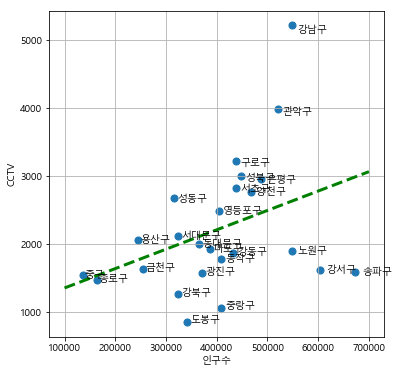

In [155]:
plt.figure( figsize = (6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls = 'dashed', color = 'g', lw = 3 )
# 포인트에 자치구 표현 (전체 드로잉)
# 대상 선정, 좌표(X1=X*1.02, Y1=Y*0.98)
for n in range(data_result.shape[0]) :
    plt.text(data_result['인구수'][n]*1.02, data_result['소계'][n]*0.98, data_result.index[n], fontsize=10)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### 대표값 기준, 멀수록 색상을 진하게 혹은 연하게 처리
- 색상으로도 설명할 수 있도록 데코레이션 처리

In [156]:
# 거리 계산, 오차
# 식 = |cctv tn - 해당 인구수의 평균 cctv 수|(절대값)
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

In [158]:
data_result.head(2)

,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
자치구,,,,,,,,,,,,,,,
강남구,5221,2885.0,546,765,577,448,80.970537,547453,542364,5089,67085,0.929578,12.254020,0.953689,2586.344483
강동구,1879,883.0,144,194,273,385,112.797282,431920,427573,4347,58770,1.006436,13.606686,0.435034,426.108759


###### plt.scatter(data_result['인구수'], data_result['소계'], s=50, c = data_result['오차'])

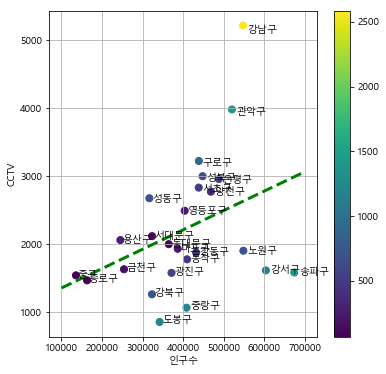

In [160]:
plt.figure( figsize = (6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50, c = data_result['오차'])
plt.plot(fx, f1(fx), ls = 'dashed', color = 'g', lw = 3 )
for n in range(data_result.shape[0]) :
    plt.text(data_result['인구수'][n]*1.02, data_result['소계'][n]*0.98, data_result.index[n], fontsize=10)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
# 칼라바
plt.colorbar()
plt.show()

In [179]:
# 오차 top3(내림, 오름)
tmp = data_result['오차'].sort_values(ascending=True).index[:3] 
tmp = tmp.append(data_result['오차'].sort_values(ascending=True).index[-3:])
tmp

Index(['종로구', '중구', '동대문구', '송파구', '관악구', '강남구'], dtype='object', name='자치구')

### 오차값이 큰 자치구 6개만 텍스트 표현

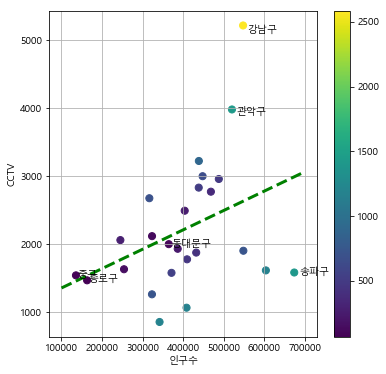

In [180]:
plt.figure( figsize = (6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50, c = data_result['오차'])
plt.plot(fx, f1(fx), ls = 'dashed', color = 'g', lw = 3 )
for n in range(data_result.shape[0]) :
    if data_result.index[n] in tmp :
        plt.text(data_result['인구수'][n]*1.02, 
                 data_result['소계'][n]*0.98, 
                 data_result.index[n], 
                 fontsize=10)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
# 칼라바
plt.colorbar()
plt.show()

###### 자료 덤프 : .to_csv()

In [181]:
# 자료 덤프
data_result.to_csv('../data/population_per_cctv_analysis_result.csv', sep=',', encoding='utf-8') 